# Python Assignment 2

# Context of Data

### Company - UK-based and registered non-store online retail

### Products for selling - Mainly all-occasion gifts

### Customers - Most are wholesalers (local or international)

### Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [10]:
#Import Dataset using pandas
test = pd.read_csv("D:\\3258\\Ecommerce.csv", encoding = 'ISO-8859-1')
test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
test.shape

(541909, 8)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [14]:
# check missing values for each column 
test.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [16]:
# Check for missing values in all columns and replace them with the appropriate metric ((Mean/Median/Mode))
x = pd.DataFrame(test)
x.fillna(x['CustomerID'].mean())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [18]:
# check missing values for each row
test[test.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [22]:
#Remove rows with missing values
test= test.dropna()

In [23]:
# check missing values for each column 
test.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [24]:
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [25]:
# change column CustomerID - Str to Int Datatype 
test['CustomerID'] = test['CustomerID'].astype('int64')

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int64  
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.9+ MB


In [27]:
test.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


### Remove Quantity with Negative Values

In [28]:
test= test[test.Quantity > 0]

In [43]:
test.describe().round(2)

,Quantity,UnitPrice,CustomerID,AmountSpent
count,397924.00,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32,22.39
std,180.42,22.10,1713.17,309.06
min,1.00,0.00,12346.00,0.00
25%,2.00,1.25,13969.00,4.68
50%,6.00,1.95,15159.00,11.80
75%,12.00,3.75,16795.00,19.80
max,80995.00,8142.75,18287.00,168469.60


In [31]:
# Co- relation between all columns
test.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.004561,-0.006411
UnitPrice,-0.004561,1.000000,-0.010863
CustomerID,-0.006411,-0.010863,1.000000


In [32]:
# Add New Column "Amount Spent"
test['AmountSpent'] = test['Quantity'] * test['UnitPrice']

In [33]:
test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


##  Box Plot

Text(0.5, 1.0, 'Boxplot for CustomerID')

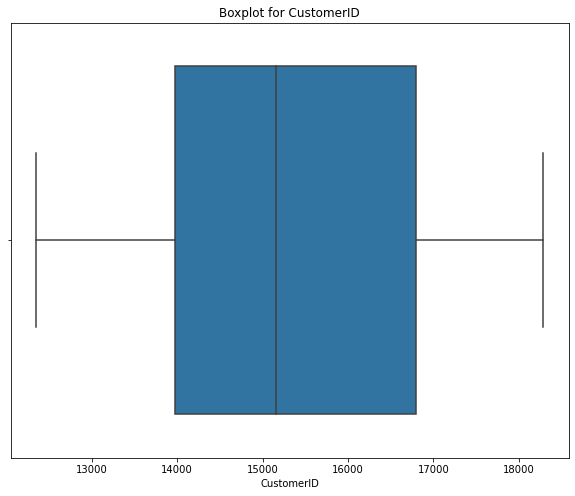

In [34]:
plt.subplots(figsize=(10,8))
sns.boxplot(test.CustomerID)
plt.xlabel('CustomerID')
plt.title('Boxplot for CustomerID')

Text(0.5, 1.0, 'Boxplot for AmountSpent')

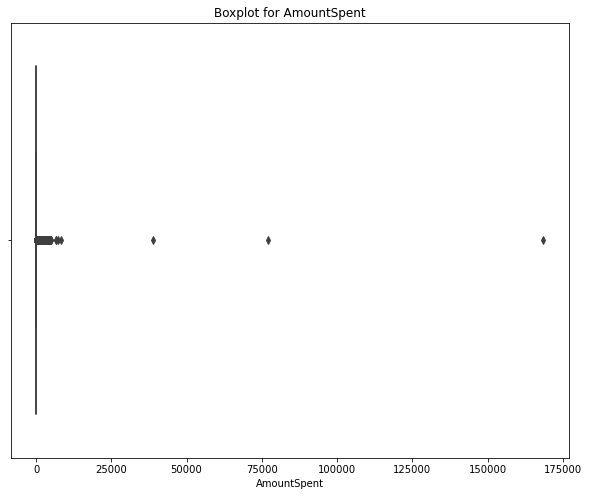

In [35]:
plt.subplots(figsize=(10,8))
sns.boxplot(test.AmountSpent)
plt.xlabel('AmountSpent')
plt.title('Boxplot for AmountSpent')

## Histogram 

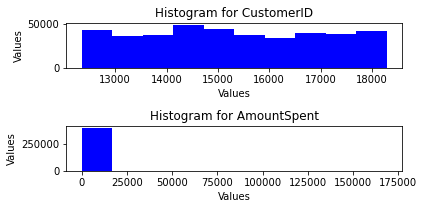

In [39]:
plt.subplot(3,1,1)
plt.title("Histogram for CustomerID")
plt.xlabel("Values")
plt.ylabel("Values")
plt.hist(test['CustomerID'],color='blue',histtype='stepfilled',orientation='vertical')
plt.subplot(3,1,2)
plt.title("Histogram for AmountSpent")
plt.xlabel("Values")
plt.ylabel("Values")
plt.hist(test['AmountSpent'],color='blue')
plt.tight_layout()

## Distribution Plot 

Text(0.5, 1.0, 'CustomerID Distribution')

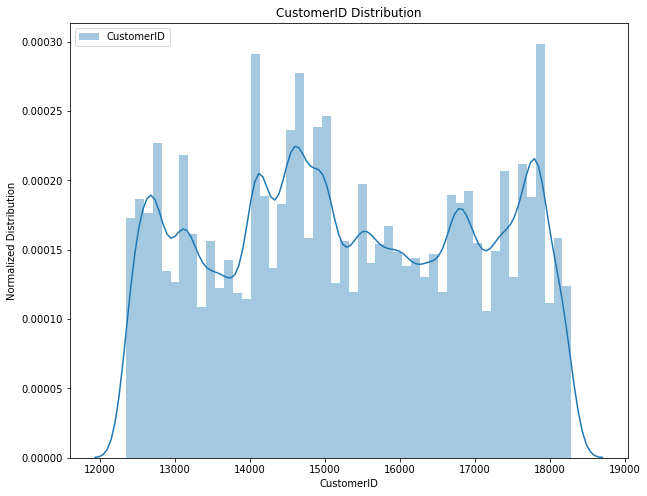

In [41]:
plt.subplots(figsize=(10,8))
sns.distplot(test.CustomerID,label='CustomerID').legend()
plt.xlabel('CustomerID')
plt.ylabel('Normalized Distribution')
plt.title('CustomerID Distribution')

Text(0.5, 1.0, 'AmountSpent Distribution')

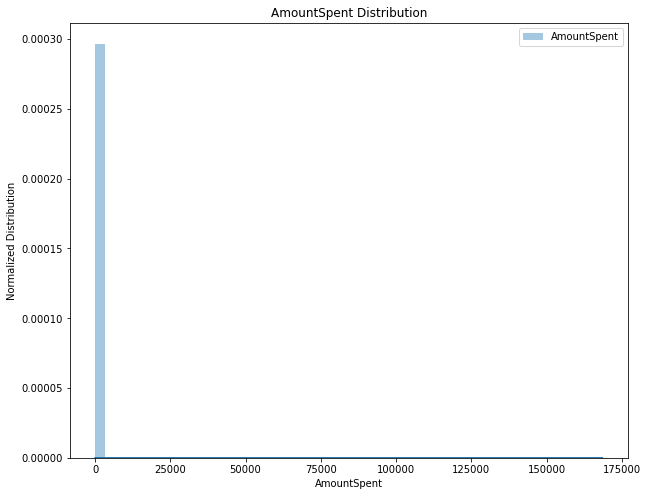

In [49]:
plt.subplots(figsize=(10,8))
sns.distplot(test.AmountSpent,label='AmountSpent').legend()
plt.xlabel('AmountSpent')
plt.ylabel('Normalized Distribution')
plt.title('AmountSpent Distribution')

##  Heat Map

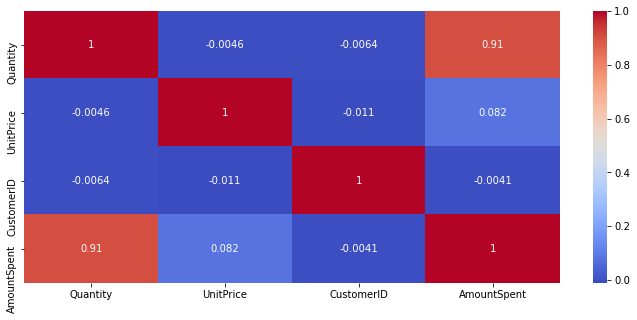

In [44]:
plt.figure(figsize=(12,5))
sns.heatmap(test.corr(),
            yticklabels=True,
            cbar=True,
            cmap='coolwarm',
            annot=True,
            linewidths=0,
            linecolor='grey')

##  Regression Plot

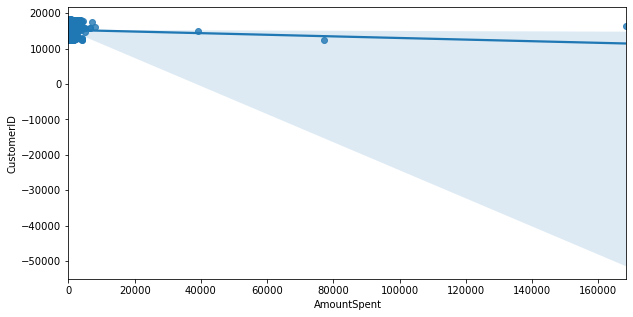

In [45]:
plt.figure(figsize=(10,5))
df1=pd.DataFrame(data = test)
sns.regplot(x='AmountSpent',
                y='CustomerID',
                data=df1)

##  Bar Plot

Text(0.5, 1.0, 'Number of Customers for different Countries')

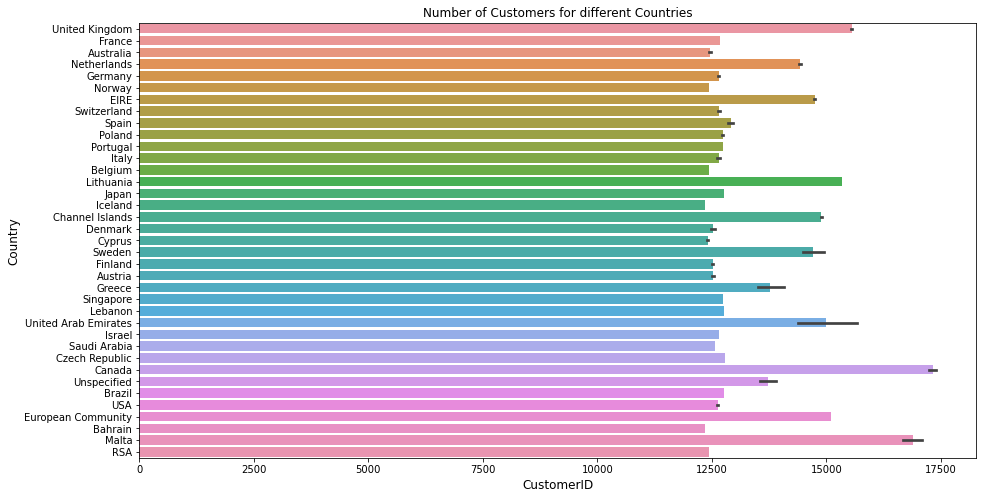

In [46]:
plt.subplots(figsize=(15,8))
sns.barplot(x="CustomerID", y="Country", data=test,orient="h")
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Customers for different Countries', fontsize=12)

Text(0.5, 1.0, 'AmountSpent by different Countries')

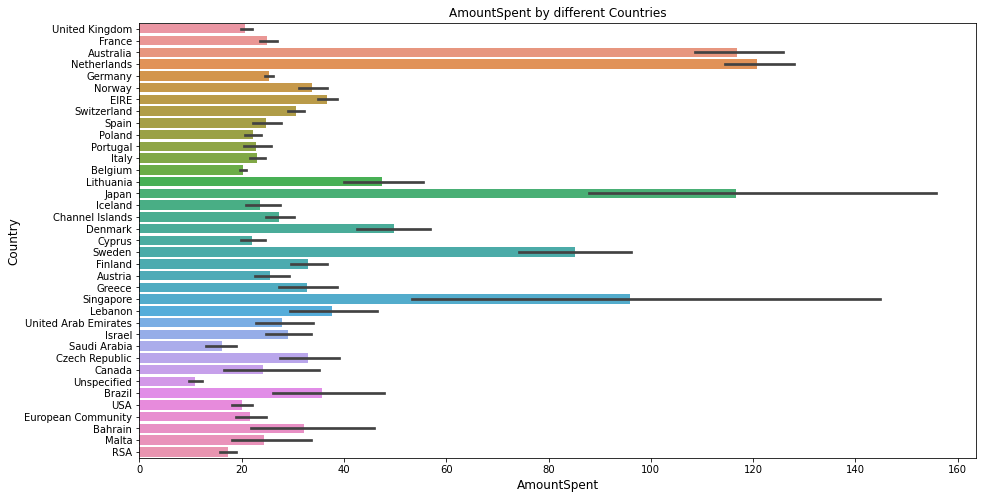

In [47]:
plt.subplots(figsize=(15,8))
sns.barplot(x="AmountSpent", y="Country", data=test,orient="h")
plt.xlabel('AmountSpent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('AmountSpent by different Countries', fontsize=12)

##  Pair Plot

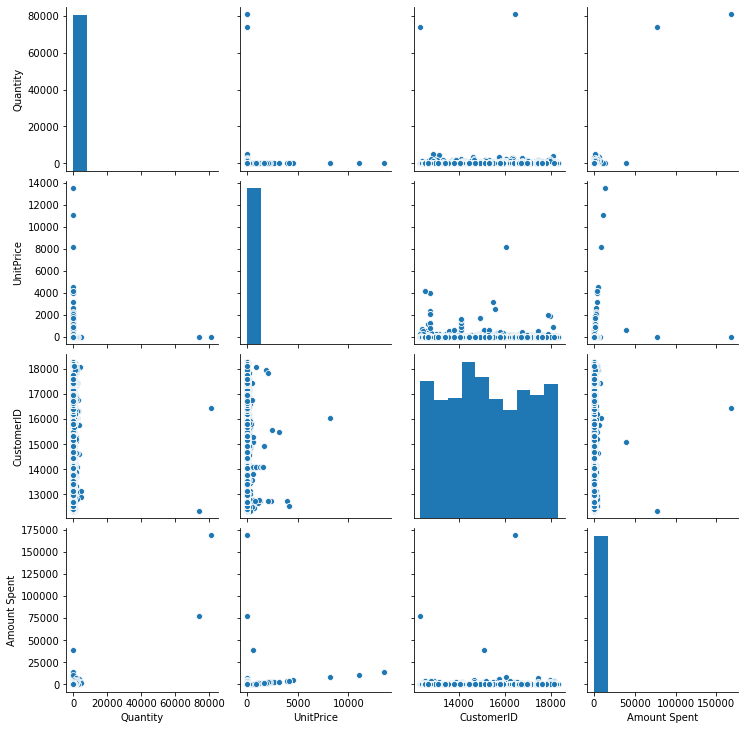

In [102]:
sns.pairplot(test, height=2.5)

## Add the columns - Month, Day and Hour for the invoice¶


In [51]:
test['InvoiceDate'] = pd.to_datetime(test.InvoiceDate, format='%m/%d/%Y %H:%M')
test.insert(loc=3, column='month', value=test.InvoiceDate.dt.month)
test.insert(loc=4, column='day', value=test.InvoiceDate.dt.day)
test.insert(loc=5, column='hour', value=test.InvoiceDate.dt.hour)
test.insert(loc=6, column='year', value=test.InvoiceDate.dt.year)

In [52]:
test.head()

,InvoiceNo,StockCode,Description,month,day,hour,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,1,8,2010,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,12,1,8,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12,1,8,2010,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12,1,8,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,12,1,8,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Line Chart

Text(0.5, 1.0, 'Number of Customer based on Year')

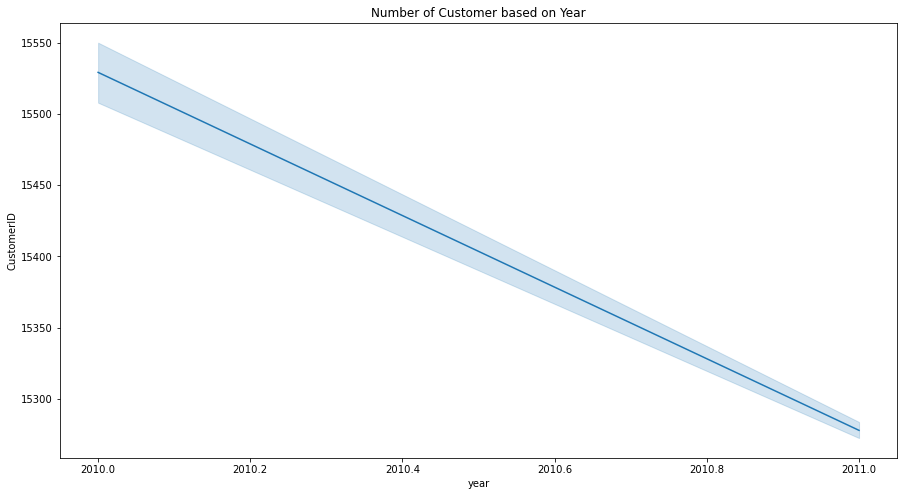

In [58]:
plt.subplots(figsize=(15,8))
sns.lineplot(data=test, x="year", y="CustomerID")
plt.title('Number of Customer based on Year', fontsize=12)

Text(0.5, 1.0, 'AmountSpent based on Year')

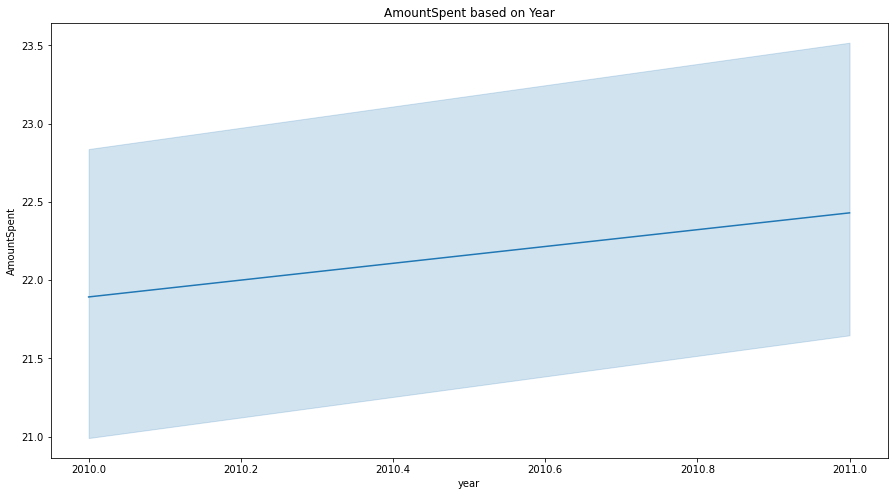

In [99]:
plt.subplots(figsize=(15,8))
sns.lineplot(data=test, x="year", y="AmountSpent",markers=True, dashes=False)
plt.title('AmountSpent based on Year', fontsize=12)

##  Skewness

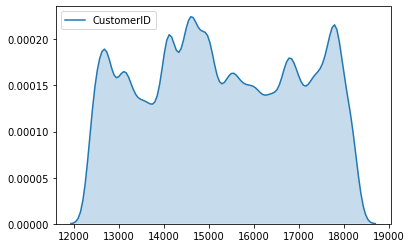

In [61]:
sns.kdeplot(test['CustomerID'],shade=True)

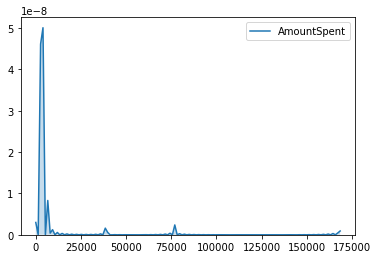

In [63]:
sns.kdeplot(test['AmountSpent'],shade=True)

##  Unique Values across all columns

In [64]:
pd.unique(test.values.ravel())

array(['536365', '85123A', 'WHITE HANGING HEART T-LIGHT HOLDER', ...,
       Timestamp('2011-12-09 12:49:00'), '581587',
       Timestamp('2011-12-09 12:50:00')], dtype=object)

## Duplicate values across all columns

In [68]:
test.duplicated(keep='last')

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 397924, dtype: bool

## Remove duplicate rows 

In [69]:
test.drop_duplicates(keep='first')

,InvoiceNo,StockCode,Description,month,day,hour,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,1,8,2010,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,12,1,8,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12,1,8,2010,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12,1,8,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,12,1,8,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9,12,2011,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,12,9,12,2011,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,12,9,12,2011,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,12,9,12,2011,4,2011-12-09 12:50:00,4.15,12680,France,16.60


## How many orders made by the customers?

In [71]:
test.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(20)

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
5,12352,Norway,85
6,12353,Bahrain,4
7,12354,Spain,58
8,12355,Bahrain,13
9,12356,Portugal,59


## TOP 5 customers with higher number of orders

In [74]:
test.sort_values(by='InvoiceNo', ascending=False).head()

,InvoiceNo,StockCode,Description,month,day,hour,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,12,9,12,2011,3,2011-12-09 12:50:00,4.95,12680,France,14.85
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,12,9,12,2011,8,2011-12-09 12:50:00,1.95,12680,France,15.60
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,9,12,2011,12,2011-12-09 12:50:00,1.65,12680,France,19.80
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,9,12,2011,12,2011-12-09 12:50:00,1.65,12680,France,19.80
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,12,9,12,2011,4,2011-12-09 12:50:00,3.75,12680,France,15.00


##  How much money spent by the customers?

Text(0.5, 1.0, 'Money Spent for different Customers')

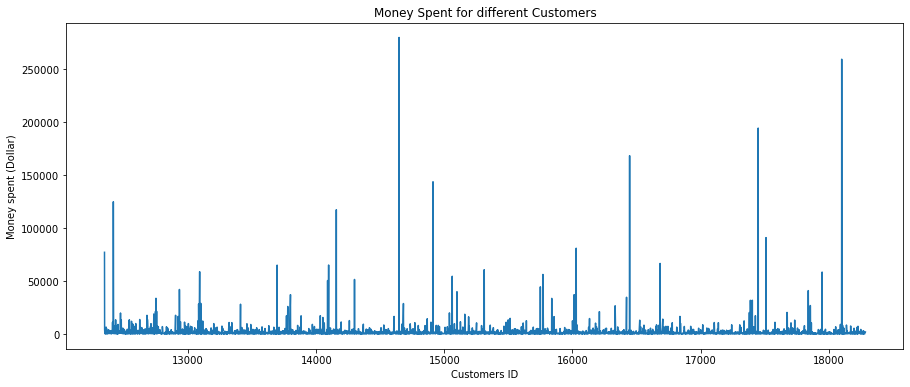

In [78]:
z = test.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(Z.CustomerID, z.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')

## Top 5 customers with highest money spent

In [79]:
test.sort_values(by='AmountSpent', ascending=False).head()

,InvoiceNo,StockCode,Description,month,day,hour,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",12,9,9,2011,80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,18,10,2011,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,6,10,15,2011,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.00
173382,551697,POST,POSTAGE,5,3,13,2011,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,9,20,11,2011,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72


##  How many orders per month?

[Text(0, 0, 'Dec_10'),
 Text(0, 0, 'Jan_11'),
 Text(0, 0, 'Feb_11'),
 Text(0, 0, 'Mar_11'),
 Text(0, 0, 'Apr_11'),
 Text(0, 0, 'May_11'),
 Text(0, 0, 'Jun_11'),
 Text(0, 0, 'July_11'),
 Text(0, 0, 'Aug_11'),
 Text(0, 0, 'Sep_11'),
 Text(0, 0, 'Oct_11'),
 Text(0, 0, 'Nov_11')]

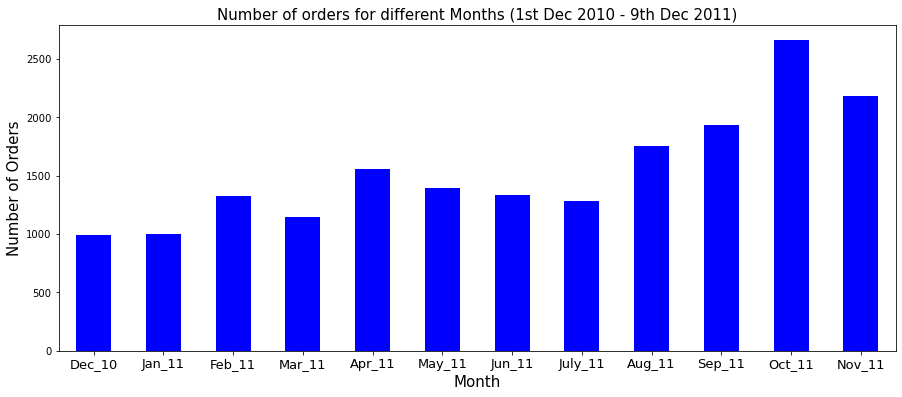

In [82]:
x = test.groupby('InvoiceNo')['month'].unique().value_counts().sort_index().plot(kind='bar',color='blue',figsize=(15,6))
x.set_xlabel('Month',fontsize=15)
x.set_ylabel('Number of Orders',fontsize=15)
x.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
x.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

## How many orders per day?

Text(0.5, 1.0, 'Number of orders for different Days')

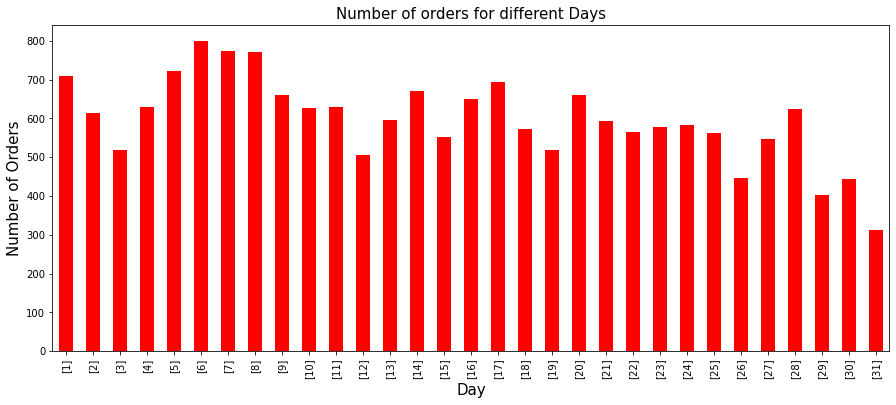

In [86]:
ax = test.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',color='red',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)

## How many orders per hour?

[Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20')]

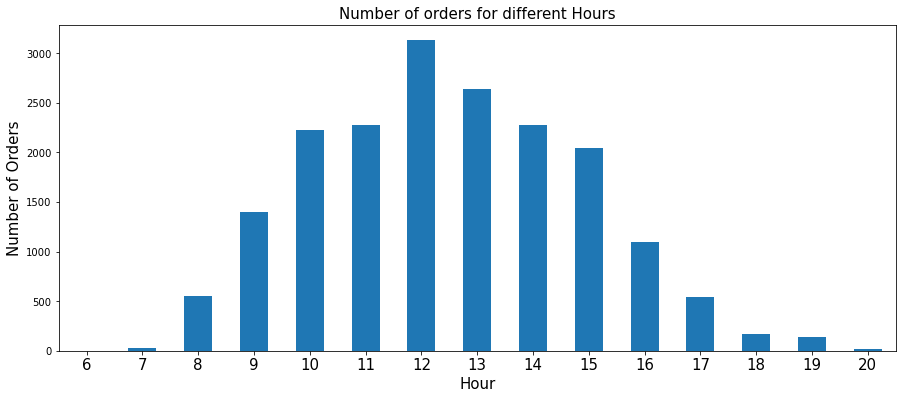

In [89]:
test.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index()
v = test.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
v.set_xlabel('Hour',fontsize=15)
v.set_ylabel('Number of Orders',fontsize=15)
v.set_title('Number of orders for different Hours',fontsize=15)
v.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)

##  How many orders for each country?

Text(0.5, 1.0, 'Number of Orders for different Countries')

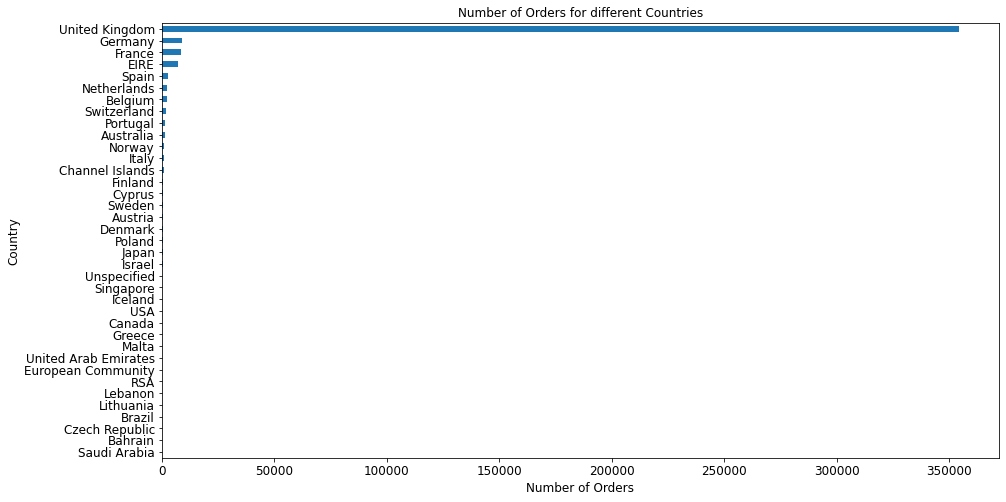

In [92]:
Orders = test.groupby('Country')['InvoiceNo'].count().sort_values()
plt.subplots(figsize=(15,8))
Orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)

## Orders trend across months

[Text(0, 0, 'Dec_10'),
 Text(0, 0, 'Jan_11'),
 Text(0, 0, 'Feb_11'),
 Text(0, 0, 'Mar_11'),
 Text(0, 0, 'Apr_11'),
 Text(0, 0, 'May_11'),
 Text(0, 0, 'Jun_11'),
 Text(0, 0, 'July_11')]

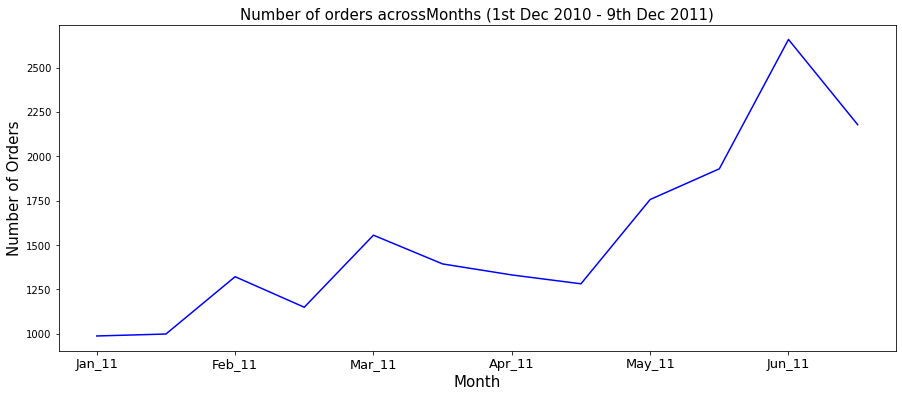

In [95]:
p = test.groupby('InvoiceNo')['month'].unique().value_counts().sort_index().plot(kind='line',color='blue',figsize=(15,6))
p.set_xlabel('Month',fontsize=15)
p.set_ylabel('Number of Orders',fontsize=15)
p.set_title('Number of orders acrossMonths (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
p.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

## How much money spent by each country?

Text(0.5, 1.0, 'Money Spent by different Countries')

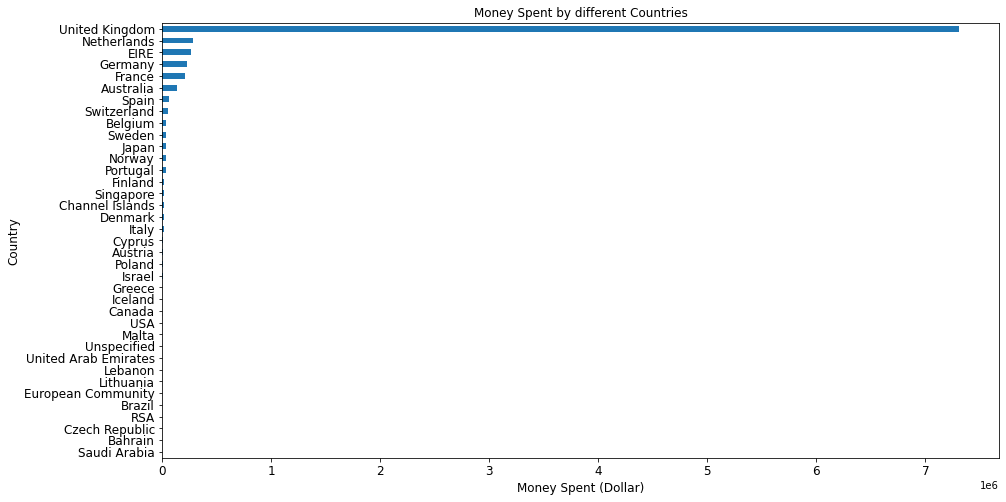

In [97]:
Country_AmountSpent = test.groupby('Country')['AmountSpent'].sum().sort_values()
plt.subplots(figsize=(15,8))
Country_AmountSpent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)